# Q1

These rules make sense, since firstly, trees would randomly be spread across a forest which is reflected by the initial random mixture of tree cells and empty sites. Then, a tree could spontaneously burn, caused by extreme heat and some sort of ignition, or perhaps even by lightning. This is reflected by the fact that a tree cell can become a fire cell with probability f. The spreading of fire occurs since trees in a forest become in contact with a burning tree, and this is accounted for in the model by having a tree cell become a fire cell if one of its neighbours is a fire cell. Then, a red cell becoming an empty cell is for the fact that a scorched tree in a forest can no longer be burned again, and is no longer a living tree. Finally, an empty cell regrowing to a tree cell is for the fact that trees can regrow in random places in a forest at any given time, albeit slowly.

# Q2

I have written code in ForestFires.py which declares a ForestFire class. It initialises a grid of cells, with variables --grid_size (-g), --no_trees (-n_t), --prob_burn (-f), --prob_regrow (-p), --no_steps (-s) declared as arguments on the terminal. While these are interpreted as optional arguments by the argsparser, the code will not run properly unless values are entered for these arguments.

The class methods implement the 4 rules synchronously for 1 step, by the ForeFire.step() method. Note that the fire spreads to the 4 nearest neighbours (up, down, left, and right) with periodic boundary conditions, so in fact the grid is isotropic. Hence the grid can be thought of topologically as a sphere, for example the model can be thought of as a simple model of the Earth filled with trees.

There are also other methods to measure number of fire cells, number of tree cells, and waiting times between fires for 50 chosen cells.

There is also an optional argument --save True (False by default) if a gif of the animation is desired with the previous variables. The animation works seamlessly on the terminal however it does not work interactively within Jupyter Notebook. So running on the terminal is required for animation purposes. Note I have included example .gif files.

Example commands on Terminal:

The above command runs the animation for a 100x100 gridside, 0.5 initial fraction of trees filling the grid, f and p as stated in the problem, and 200 timesteps. Note that there is no --save True argument written here, hence the value for --save will be False by defualt, and so there will be no .gif animation saved after the code runs.

Another example which saves a 1000x1000 grid, with 1000 time_steps:

Provided everything is installed (Matplotlib, Numpy, and perhaps Pillow or ImageMagick for rendering the gif files), then the code should show a live animation, then it will re-run the code but this time saving the animation.

If in doubt, write 'python animate.py --help' or 'python animate.py -h'.

You should see the following text if you type --help or -h as an argument:

In [51]:
!python animate.py -h

usage: animate.py [-h] [--grid_size GRID_SIZE] [--no_trees NO_TREES]
                  [--prob_burn PROB_BURN] [--prob_regrow PROB_REGROW]
                  [--no_steps NO_STEPS] [--save SAVE]

optional arguments:
  -h, --help            show this help message and exit
  --grid_size GRID_SIZE, -g GRID_SIZE
                        Set the square gridsize. Recommended: 50-1000
  --no_trees NO_TREES, -n_t NO_TREES
                        Set initial fraction of trees
  --prob_burn PROB_BURN, -f PROB_BURN
                        Set probability of spontaneous burning of a tree
  --prob_regrow PROB_REGROW, -p PROB_REGROW
                        Set probability of an empty site regrowing a tree
  --no_steps NO_STEPS, -s NO_STEPS
                        Set probability of maximum number of steps
  --save SAVE           Set to True if you want to save animation, False
                        otherwise by default


# Q3

The following uses pdf.py, with mostly the same arguments as before, except an additional -r = --no_restarts argument, i.e. the number of samples to determine the PDF of fire sizes after a fixed number of stepsm which usually needs to be very large to determine a suitable PDF.

The code in pdf.py simply initialises the ForestFire grid, updates it by --no_steps number of steps, then measures and returns the number of fire cells after the given number of steps. Then it will re-initialise the grid --no_restarts number of times which is done in parallel to speed up computation, since each sample is independent of each other. The folllowing are the plots of distributions.

## (a) PDF for f=0, p=0.5, after 100 steps with 10000 samples

Time taken: 207.0


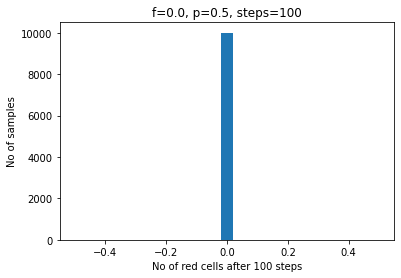

In [20]:
run -i 'pdf.py' -g 100 -n_t 0.5 -f 0 -p 0.5 -s 100 -r 10000

## (b) PDF for f=0.01, p=0.0001, after 300 steps with 10000 samples ($ 0 < p \ll f < 1 $), 

Time taken: 984.0


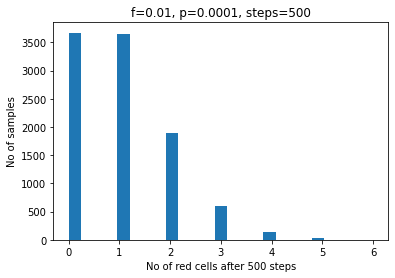

In [52]:
run -i 'pdf.py' -g 100 -n_t 0.5 -f 0.01 -p 0.0001 -s 500 -r 10000

## (c) PDF for f=0.0001, p=0.01, after 500 steps with 10000 samples ($ 0 < f \ll p < 1 $)

Time taken: 1018.0


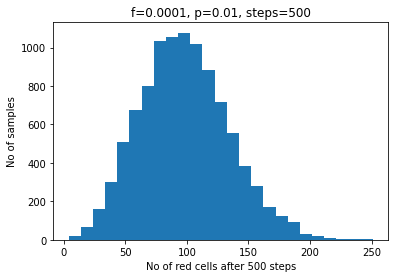

In [26]:
run -i 'pdf.py' -g 100 -n_t 0.5 -f 0.0001 -p 0.01 -s 500 -r 10000

# Q4
Note, all the PDF's in this notebook are non-normalised. The y-axis simply show the number of samples.

(a) As can be seen above in Q3(a), when $f=0, p=0.5$ all the samples returned 0 fire cells, which is sensible since f=0 means there is no probability of a tree spontaneously burning, and if no tree ever burns, then no fire would spread. Note this is also why I set the samples to run only for up to 100 steps, since by common sense, the grid won't be burning at all at any time step, so the number of fires will already be in a steady state from the beginning, since it will be fixed at 0.

(b) When $ 0 < p \ll f < 1 $, It can be seen that after 300 steps, the number of fire cells stabilises to ~0 (in comparison to 100*100 = 10000 other cells). The fact that there could be a few remaining burning cells could simply be because there are still some trees remaining which spontaneously burned at the time step it was measured. It makes sense that if the probability of burning is much greater than the probability of regrowing, that eventually all cells would burn until there are no more cells left to burn.

(c) When $ 0 < f \ll p < 1 $, the number of burning cells stabilise to some fixed number, in the case above it is given at 100 burning cells (the most probable number of red cells). This makes sense again since when the probability of regrowing is much greater than the probability of burning, then the number of trees can recover as other trees burn, so there is always some trees to which the fire can spread to, instead of the above case where all trees may burn which leaves no trees to be burned. 


# Q5

The following code is again a modification of the codes used previously. Here I chose 50 cells to sample and monitor their waiting times between fire. I am able to choose any 50 cells due to the isotropy of the grid (periodic boundary conditions). 

## (a) PDF for waiting times for $f=0, p=0.5$

Time taken: 13.0


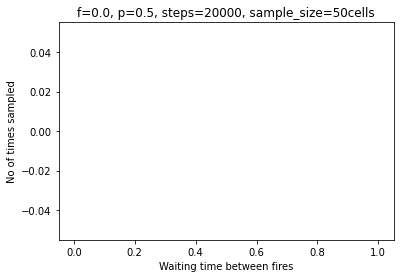

In [34]:
run -i 'waiting.py' -g 100 -n_t 0.5 -f 0 -p 0.5 -s 20000

It makes sense that my code did not return anything, since no fire cell ever burned for f=0, and hence the waiting time is indefinite. 

## (b) PDF for waiting time for $0<p\ll f<1$

Time taken: 1280.0


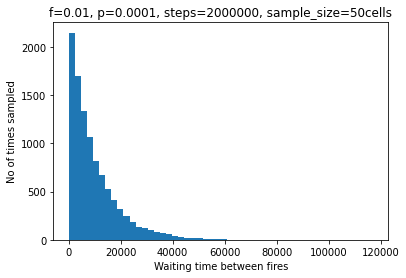

In [53]:
run -i 'waiting.py' -g 100 -n_t 0.5 -f 0.01 -p 0.0001 -s 2000000

Here the sampling returned a distribution spread over magnitudes 0-60000, due to having a high probability of burning, and low probability of regrowing. The lower part of the spectrum reflects the fact that cells which regrow straight after burning are most likely to be burned again while the higher end of the spectrum reflects the fact that cells may have taken a while to regrow and re-burn.

## (b) PDF for waiting time for $0<f \ll p <1$

Time taken: 1695.0


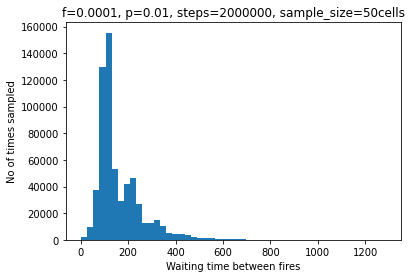

In [54]:
run -i 'waiting.py' -g 100 -n_t 0.5 -f 0.0001 -p 0.01 -s 2000000

Again, as in Q3/Q4, there is a stable number of burning cells, and hence also a stable number of tree cells after some fixed time, and so it makes sense that the distribution has a high probability for some non-zero waiting times, and also the waiting times cannot be too large, otherwise that would signify the a cell stays mostly green or black, which cannot be true if there is a steady state for the number of red cells and green cells. This can be attributed to the fact the the fire must be in motion and cannot be static, i.e. the steady state for number of fires cannot be obtained from having a static set of burning cells. Note that there seems to be a main peak, then other sub-peaks -> perhaps a power law. (highest peak just before 200, then a smaller peak on 200, and another smaller peak just before 400).

## (Q6 and Q7 are written by hand)

## Q8